In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Appareils_all.xlsx'
df_appareils = pd.read_excel(file_path)


# Filtrer uniquement les données de la catégorie "Global"
df_global = df_appareils[df_appareils['Source'] == 'Global'].copy()



=== Performance par appareil (catégorie Global uniquement) ===
      Appareil   Clics  Impressions  CTR_calculé  Position  \
12      Mobile  408346     21087244       0.0194     13.94   
13  Ordinateur  255313     17067753       0.0150     27.67   
14    Tablette   12652       318293       0.0397      8.17   

    Pourcentage_impressions   Fiabilité  
12                    54.81  Excellente  
13                    44.36  Excellente  
14                     0.83  Excellente  


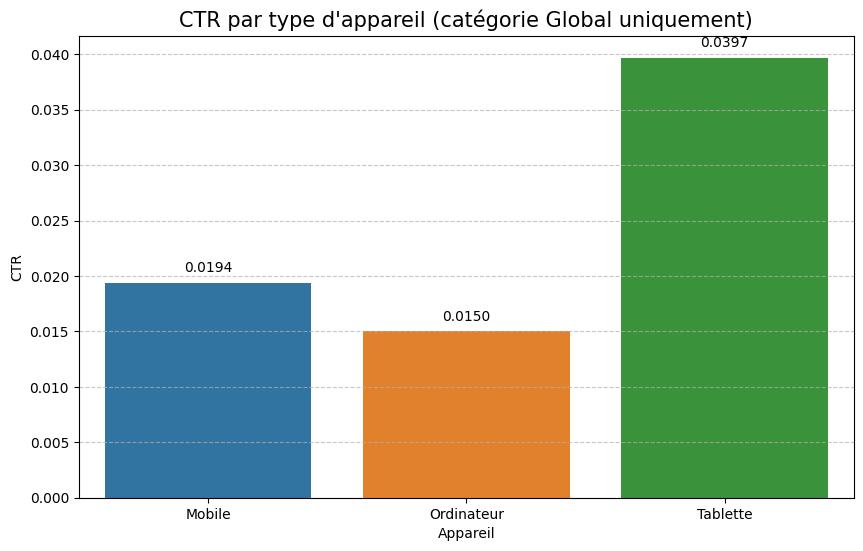

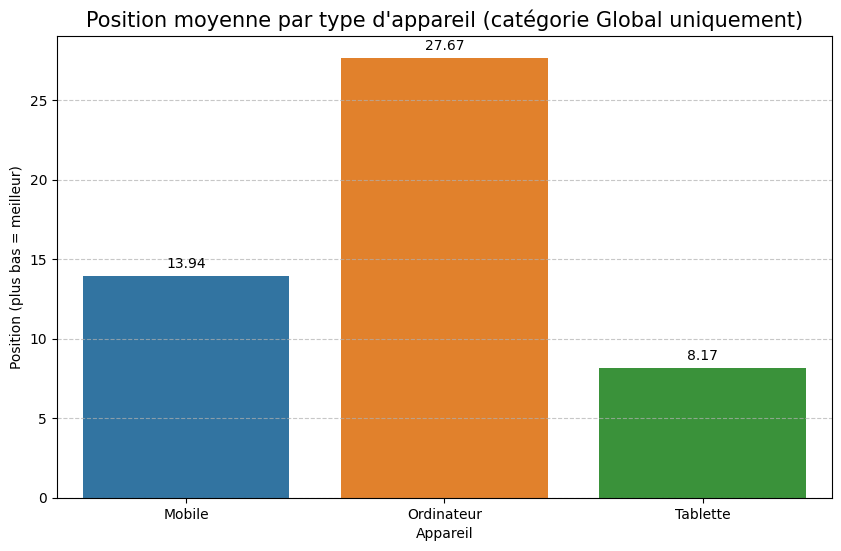

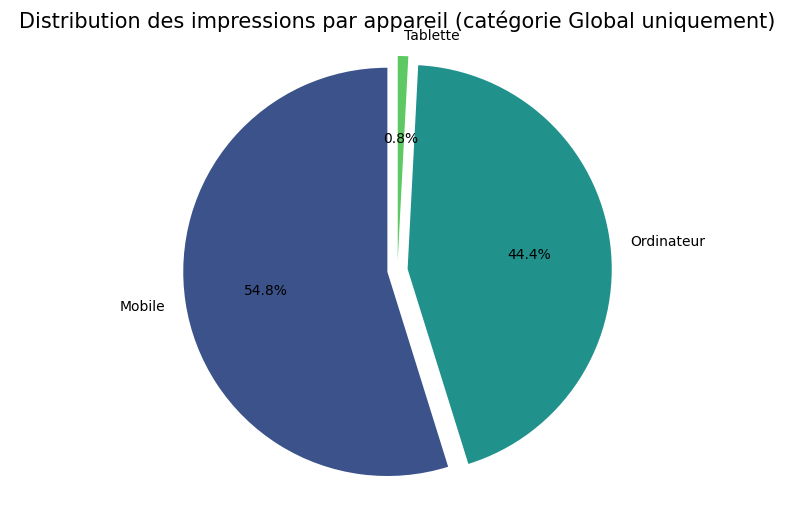

In [10]:
# 1. Tableau récapitulatif des performances par appareil (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par appareil (catégorie Global uniquement) ===")
print(df_global_sorted[['Appareil', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par appareil
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Appareil', 
    y='CTR_calculé', 
    hue='Appareil',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'appareil (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.savefig('../assets/ctr_par_appareil_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par appareil
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Appareil', 
    y='Position', 
    hue='Appareil',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'appareil (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.savefig('../assets/position_par_appareil_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Appareil'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par appareil (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

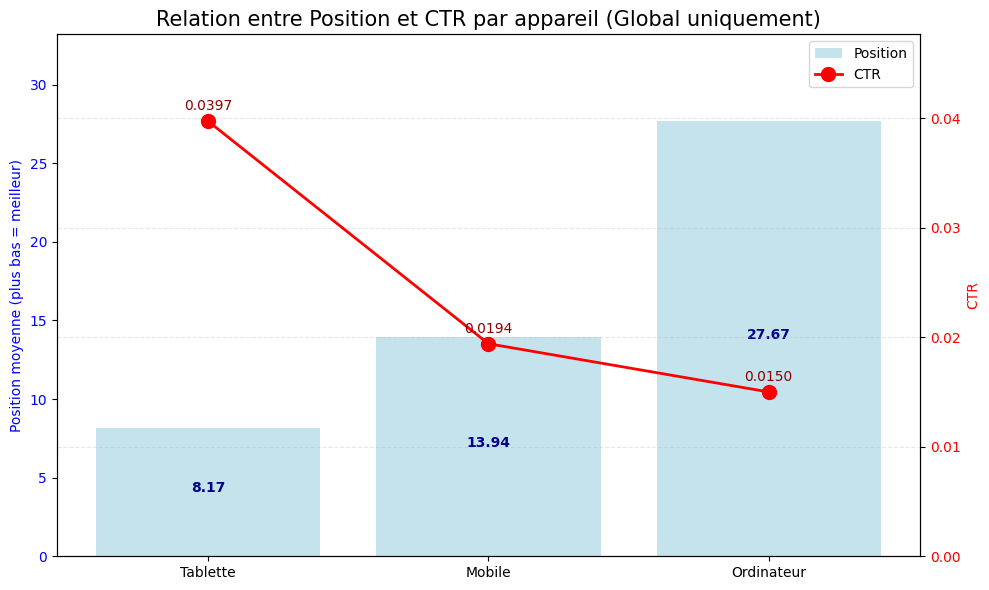


=== Analyse de la relation Position vs CTR (Global uniquement) ===
      Appareil  Position  Position Rang  CTR_calculé  CTR Rang  Cohérence  \
12      Mobile     13.94              2       0.0194         2       True   
13  Ordinateur     27.67              3       0.0150         3       True   
14    Tablette      8.17              1       0.0397         1       True   

    % des impressions  
12              54.81  
13              44.36  
14               0.83  


In [7]:
# Créer un graphique qui montre clairement la relation entre position et CTR
plt.figure(figsize=(10, 6))

# Trier les données par position (de la meilleure à la moins bonne)
df_sorted = df_global_sorted.sort_values('Position')

# Créer des barres pour les valeurs de position (axe gauche)
ax1 = plt.gca()
ax1.bar(df_sorted['Appareil'], df_sorted['Position'], color='lightblue', alpha=0.7, label='Position')
ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, max(df_sorted['Position']) * 1.2])

# Créer un axe secondaire pour le CTR (axe droit)
ax2 = ax1.twinx()
ax2.plot(df_sorted['Appareil'], df_sorted['CTR_calculé'], 'ro-', linewidth=2, markersize=10, label='CTR')
ax2.set_ylabel('CTR', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, max(df_sorted['CTR_calculé']) * 1.2])

# Ajouter les valeurs de position sur les barres
for i, v in enumerate(df_sorted['Position']):
    ax1.text(i, v/2, f"{v:.2f}", ha='center', color='darkblue', fontweight='bold')

# Ajouter les valeurs de CTR sur les points
for i, v in enumerate(df_sorted['CTR_calculé']):
    ax2.text(i, v + 0.001, f"{v:.4f}", ha='center', color='darkred')

# Ajouter un titre et une légende
plt.title('Relation entre Position et CTR par appareil (Global uniquement)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Combiner les légendes des deux axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('../assets/position_ctr_relation_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Créer aussi un tableau pour montrer clairement la relation
relation_table = df_global_sorted[['Appareil', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR (Global uniquement) ===")
print(relation_table[['Appareil', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

## Une cohérence parfaite entre position et CTR: 

La "cohérence" dans cette analyse représente la correspondance entre le classement (rang) des appareils selon leur position moyenne et le classement selon leur CTR.
Une cohérence parfaite (True) signifie que le classement des appareils est le même qu'on les ordonne par position ou par CTR. Par exemple, si la Tablette a le rang 1 pour la position et le rang 1 pour le CTR, alors sa cohérence est True.


Pour les trois types d'appareils, le rang de la position correspond exactement au rang du CTR (colonne "Cohérence" = True). Cela confirme la règle SEO fondamentale: une meilleure position dans les résultats de recherche entraîne un meilleur taux de clics.


## Tablette: performance supérieure:

Meilleure position moyenne (8.17)

Meilleur CTR (0.0397, soit 3.97%)

Cependant, volume très faible (seulement 0.83% des impressions)


## Mobile: bon équilibre performance/volume:

Position correcte (13.94, 2ème rang)

CTR respectable (0.0194, soit 1.94%, 2ème rang)

Volume dominant (54.81% des impressions)


## Ordinateur: performance inférieure mais volume important:

Position la moins bonne (27.67)

CTR le plus faible (0.0150, soit 1.50%)

Volume substantiel (44.36% des impressions)



## Implications stratégiques:

Le comportement des utilisateurs est cohérent à travers les appareils: meilleure position = meilleur CTR

La tablette offre le meilleur ratio position/CTR, mais son volume est marginal

Les efforts d'optimisation devraient se concentrer prioritairement sur Mobile et Ordinateur qui représentent 99% du trafic

L'écart de position entre Mobile (13.94) et Ordinateur (27.67) est significatif et pourrait expliquer la différence de CTR

L'amélioration du positionnement sur Ordinateur pourrait avoir un impact substantiel sur le CTR global

=== Performance par type d'apparence (catégorie Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche   Clics  Impressions  \
7                             Extrait d'avis  209888      6449490   
8                       Extraits de produits   10996       610625   
9                         Résultats traduits     190        11909   
10                                    Vidéos       0           32   

    CTR_calculé  Position  Pourcentage_impressions   Fiabilité  
7        0.0325     27.17                    91.20  Excellente  
8        0.0180     27.56                     8.63  Excellente  
9        0.0160     11.11                     0.17  Excellente  
10       0.0000      5.50                     0.00      Faible  


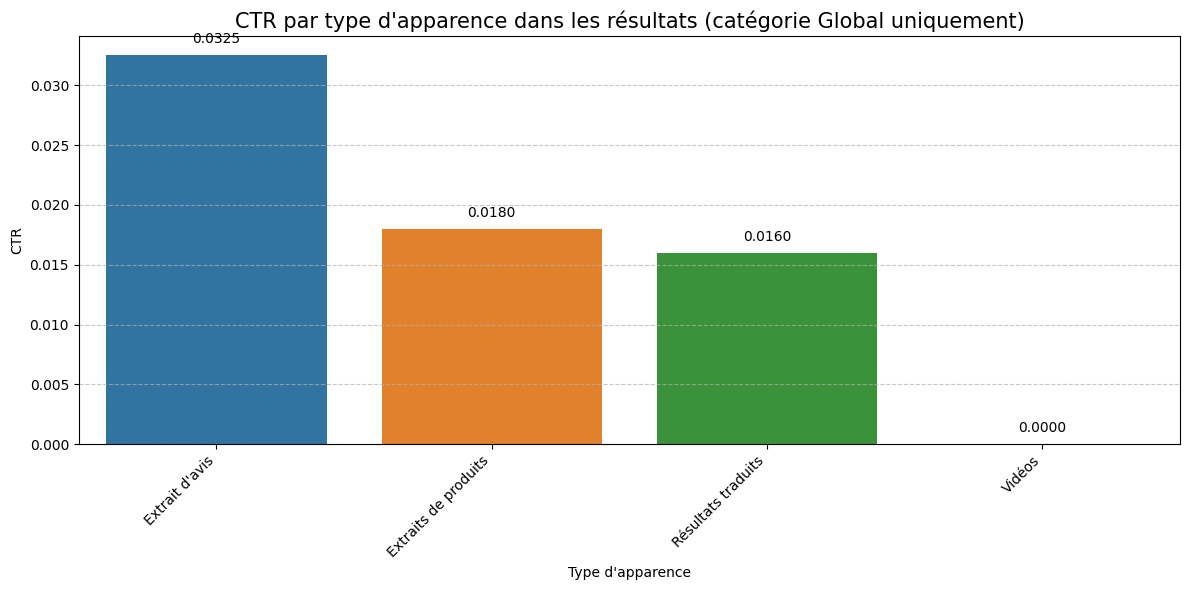

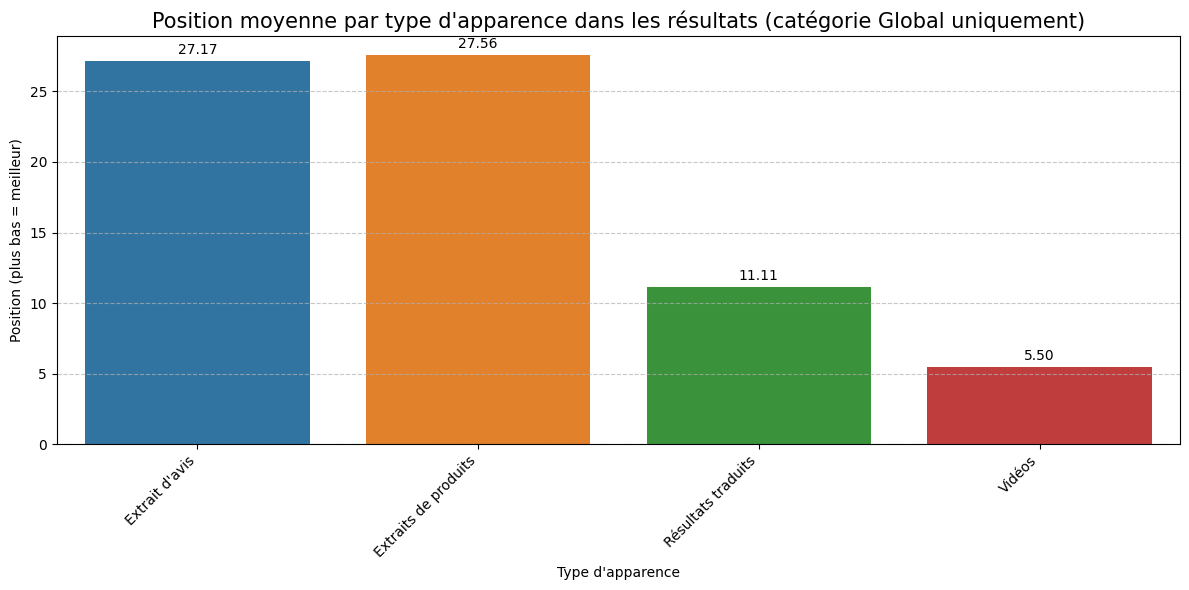

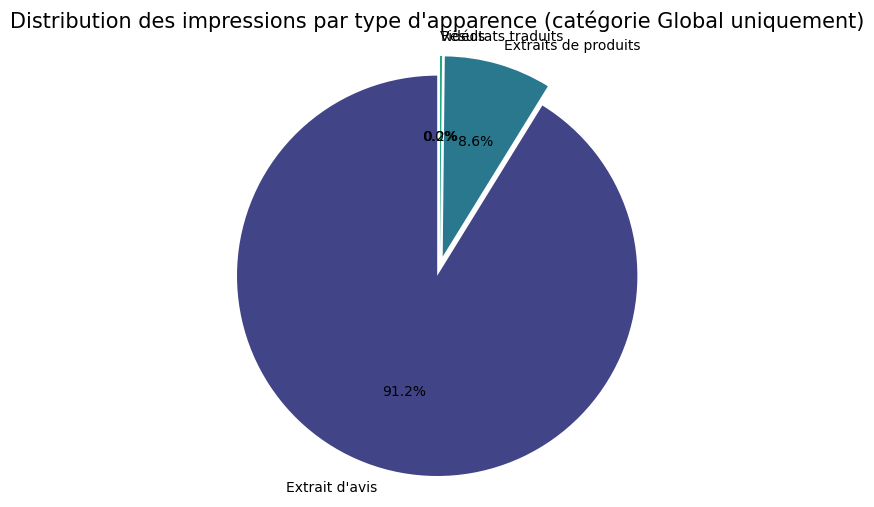


=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche  Position  Position Rang  \
7                             Extrait d'avis     27.17              3   
8                       Extraits de produits     27.56              4   
9                         Résultats traduits     11.11              2   
10                                    Vidéos      5.50              1   

    CTR_calculé  CTR Rang  Cohérence  % des impressions  
7        0.0325         1      False              91.20  
8        0.0180         2      False               8.63  
9        0.0160         3      False               0.17  
10       0.0000         4      False               0.00  


In [ ]:

# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx'
df = pd.read_excel(file_path)

# Filtrer uniquement les données de la catégorie "Global"
df_global = df[df['Source'] == 'Global'].copy()

# Créer le dossier assets s'il n'existe pas
os.makedirs('../assets', exist_ok=True)

# 1. Tableau récapitulatif des performances par type d'apparence (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par type d'apparence (catégorie Global uniquement) ===")
print(df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='CTR_calculé', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/ctr_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='Position', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/position_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Apparence_dans_les_résultats_de_recherche'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par type d\'apparence (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyser la relation entre position et CTR (tableau uniquement)
relation_table = df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===")
print(relation_table[['Apparence_dans_les_résultats_de_recherche', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

In [20]:
# Charger les données depuis le fichier Excel
file_path = '../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx'
df = pd.read_excel(file_path)

# Filtrer uniquement les données de la catégorie "Global"
df_global = df[df['Source'] == 'Global'].copy()

=== Performance par type d'apparence (catégorie Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche   Clics  Impressions  \
7                             Extrait d'avis  209888      6449490   
8                       Extraits de produits   10996       610625   
9                         Résultats traduits     190        11909   
10                                    Vidéos       0           32   

    CTR_calculé  Position  Pourcentage_impressions   Fiabilité  
7        0.0325     27.17                    91.20  Excellente  
8        0.0180     27.56                     8.63  Excellente  
9        0.0160     11.11                     0.17  Excellente  
10       0.0000      5.50                     0.00      Faible  


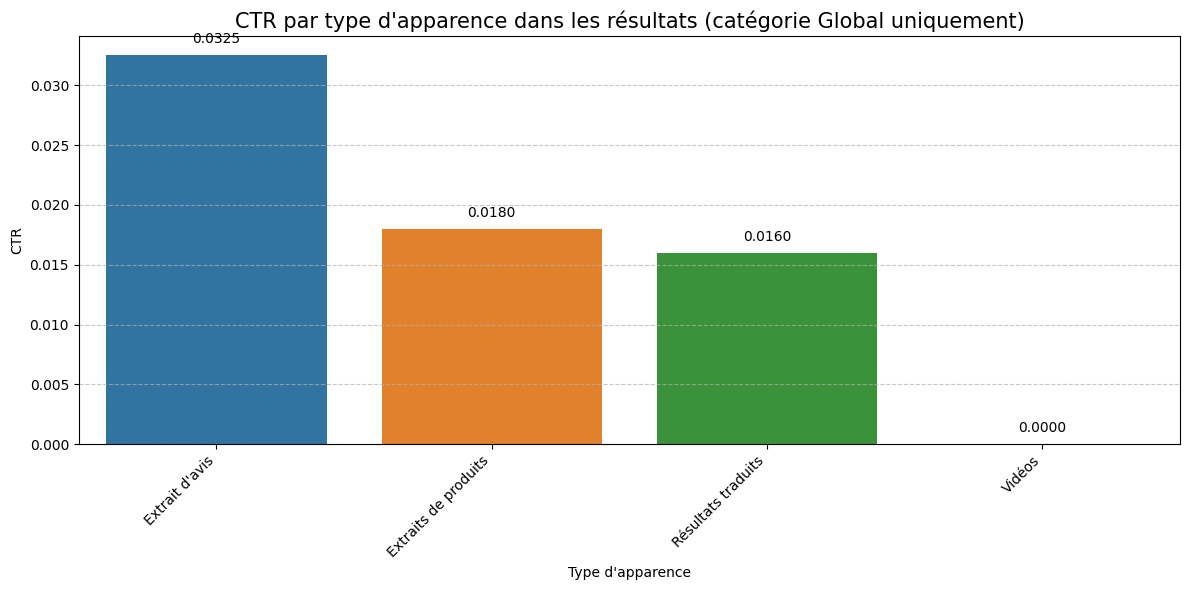

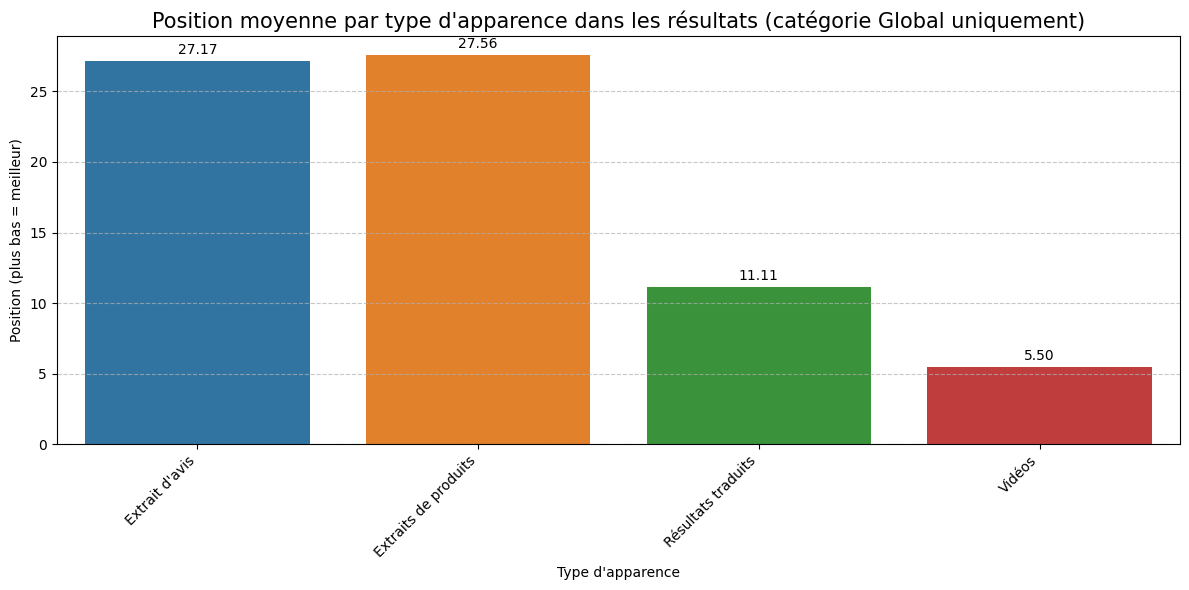

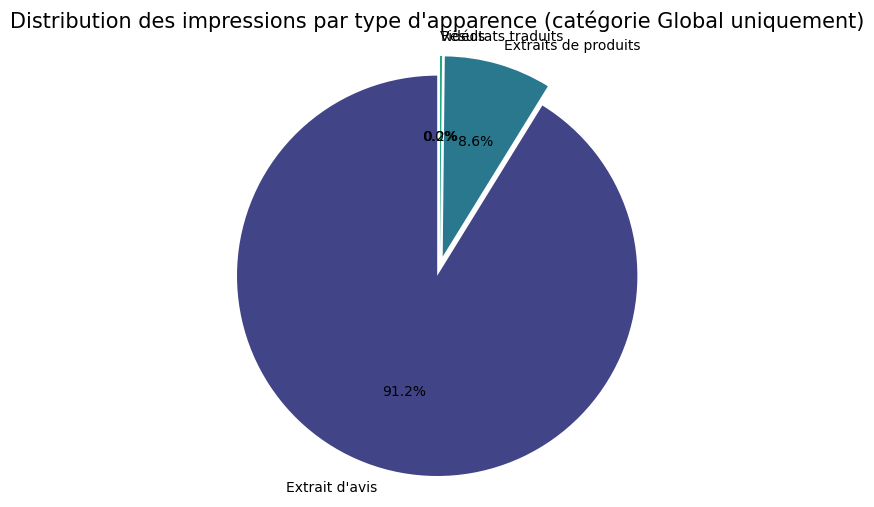

In [23]:
# 1. Tableau récapitulatif des performances par type d'apparence (Global uniquement)
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Ajouter la fiabilité
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

df_global['Fiabilité'] = df_global['Impressions'].apply(categoriser_fiabilite)

# Calculer le pourcentage d'impressions par rapport au total
total_impressions_global = df_global['Impressions'].sum()
df_global['Pourcentage_impressions'] = (df_global['Impressions'] / total_impressions_global * 100).round(2)

# Tri par volume d'impressions décroissant
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

print("=== Performance par type d'apparence (catégorie Global uniquement) ===")
print(df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Clics', 'Impressions', 'CTR_calculé', 'Position', 'Pourcentage_impressions', 'Fiabilité']])

# 2. Visualisation du CTR par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='CTR_calculé', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('CTR par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('CTR')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.CTR_calculé + 0.001, f"{row.CTR_calculé:.4f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/ctr_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualisation de la position moyenne par type d'apparence
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Apparence_dans_les_résultats_de_recherche', 
    y='Position', 
    hue='Apparence_dans_les_résultats_de_recherche',
    legend=False,
    data=df_global_sorted
)
plt.title('Position moyenne par type d\'apparence dans les résultats (catégorie Global uniquement)', fontsize=15)
plt.ylabel('Position (plus bas = meilleur)')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for i, row in enumerate(df_global_sorted.itertuples()):
    plt.text(i, row.Position + 0.5, f"{row.Position:.2f}", ha='center')

plt.tight_layout()
plt.savefig('../assets/position_par_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualisation de la distribution des impressions
plt.figure(figsize=(10, 6))
plt.pie(
    df_global_sorted['Impressions'], 
    labels=df_global_sorted['Apparence_dans_les_résultats_de_recherche'],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(df_global_sorted),  # Légère séparation pour tous les segments
    colors=sns.color_palette('viridis', len(df_global_sorted))
)
plt.title('Distribution des impressions par type d\'apparence (catégorie Global uniquement)', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le pie est circulaire
plt.savefig('../assets/distribution_impressions_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

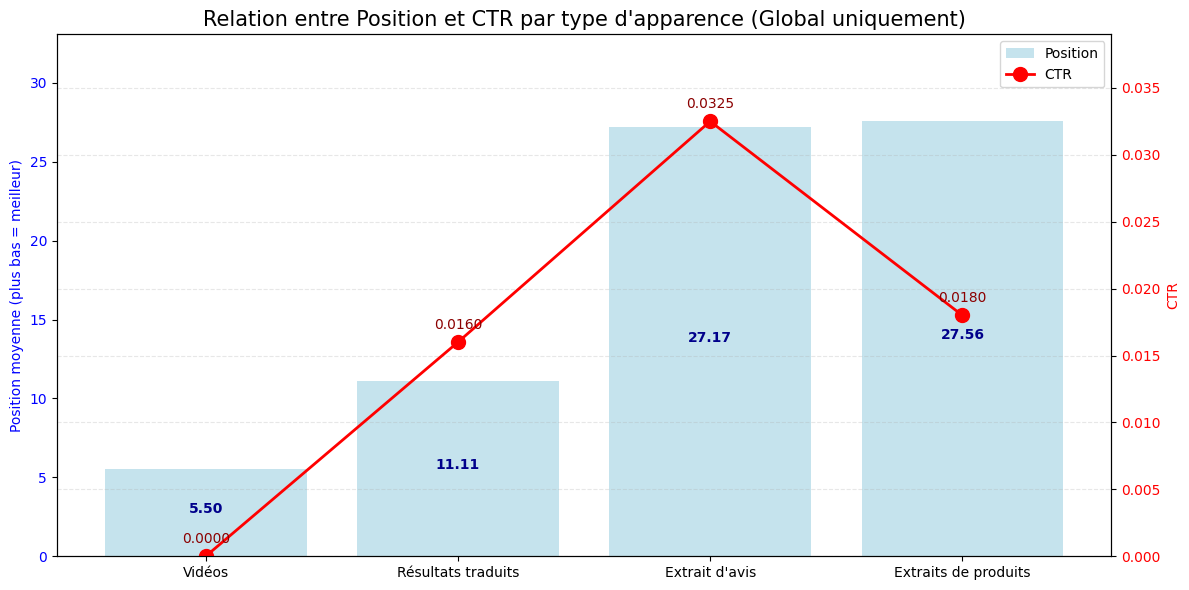


=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===
   Apparence_dans_les_résultats_de_recherche  Position  Position Rang  \
7                             Extrait d'avis     27.17              3   
8                       Extraits de produits     27.56              4   
9                         Résultats traduits     11.11              2   
10                                    Vidéos      5.50              1   

    CTR_calculé  CTR Rang  Cohérence  % des impressions  
7        0.0325         1      False              91.20  
8        0.0180         2      False               8.63  
9        0.0160         3      False               0.17  
10       0.0000         4      False               0.00  


In [18]:
# Calculer le CTR correctement
df_global['CTR_calculé'] = (df_global['Clics'] / df_global['Impressions']).round(4)

# Tri par volume d'impressions
df_global_sorted = df_global.sort_values('Impressions', ascending=False)

# Graphique de relation entre position et CTR
plt.figure(figsize=(12, 6))

# Trier les données par position (de la meilleure à la moins bonne)
df_sorted = df_global_sorted.sort_values('Position')

# Créer des barres pour les valeurs de position (axe gauche)
ax1 = plt.gca()
ax1.bar(df_sorted['Apparence_dans_les_résultats_de_recherche'], df_sorted['Position'], 
       color='lightblue', alpha=0.7, label='Position')
ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, max(df_sorted['Position']) * 1.2])

# Créer un axe secondaire pour le CTR (axe droit)
ax2 = ax1.twinx()
ax2.plot(df_sorted['Apparence_dans_les_résultats_de_recherche'], df_sorted['CTR_calculé'], 
        'ro-', linewidth=2, markersize=10, label='CTR')
ax2.set_ylabel('CTR', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, max(df_sorted['CTR_calculé']) * 1.2])

# Ajouter les valeurs de position sur les barres
for i, v in enumerate(df_sorted['Position']):
    ax1.text(i, v/2, f"{v:.2f}", ha='center', color='darkblue', fontweight='bold')

# Ajouter les valeurs de CTR sur les points
for i, v in enumerate(df_sorted['CTR_calculé']):
    ax2.text(i, v + 0.001, f"{v:.4f}", ha='center', color='darkred')

# Ajouter un titre et une légende
plt.title('Relation entre Position et CTR par type d\'apparence (Global uniquement)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Combiner les légendes des deux axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('../assets/position_ctr_relation_apparence_global_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Tableau d'analyse de la relation entre position et CTR
relation_table = df_global_sorted[['Apparence_dans_les_résultats_de_recherche', 'Position', 'CTR_calculé', 'Impressions']].copy()
relation_table['% des impressions'] = (relation_table['Impressions'] / relation_table['Impressions'].sum() * 100).round(2)

# Calculer si le CTR est cohérent avec la position (meilleure position = meilleur CTR ?)
relation_table['Position Rang'] = relation_table['Position'].rank().astype(int)
relation_table['CTR Rang'] = relation_table['CTR_calculé'].rank(ascending=False).astype(int)
relation_table['Cohérence'] = relation_table['Position Rang'] == relation_table['CTR Rang']

print("\n=== Analyse de la relation Position vs CTR par type d'apparence (Global uniquement) ===")
print(relation_table[['Apparence_dans_les_résultats_de_recherche', 'Position', 'Position Rang', 'CTR_calculé', 'CTR Rang', 'Cohérence', '% des impressions']])

## 1. Absence totale de cohérence entre position et CTR
Contrairement à ce qu'on pourrait attendre, aucun type d'apparence ne présente de cohérence entre sa position et son CTR (tous ont "Cohérence = False"). Cette situation est inhabituelle car normalement, une meilleure position (chiffre plus bas) devrait correspondre à un meilleur CTR.

## 2. Extrait d'avis: performance paradoxale

Position moyenne médiocre (27.17, rang 3)
Meilleur CTR (0.0325, soit 3.25%, rang 1)
Volume dominant (91.20% des impressions)
Fiabilité statistique excellente due au volume important

Cette performance suggère que ce format est intrinsèquement attractif pour les utilisateurs, qui cliquent dessus malgré son positionnement relativement bas.

## 3. Extraits de produits: performances moyennes

Position moyenne la plus basse (27.56, rang 4)
CTR intermédiaire (0.0180, soit 1.80%, rang 2)
Volume significatif (8.63% des impressions)

## 4. Résultats traduits: sous-performance

Bonne position moyenne (11.11, rang 2)
CTR relativement faible (0.0160, soit 1.60%, rang 3)
Volume très faible (0.17% des impressions)

Malgré un bon positionnement, ce format génère moins de clics que prévu.

## 5. Vidéos: cas particulier

Meilleure position moyenne (5.50, rang 1)
CTR nul (0.0000, rang 4)
Volume négligeable (0.00% des impressions)

Ce format apparaît rarement et, de façon surprenante, ne génère aucun clic malgré sa position privilégiée.
Implications stratégiques

L'importance du format sur le comportement utilisateur: Le CTR semble davantage influencé par le type d'apparence que par la position.
Opportunité pour les extraits d'avis: Malgré leur position moins favorable, ils génèrent le meilleur engagement.
Potentiel sous-exploité des vidéos: Leur excellente position pourrait être mieux valorisée avec un contenu plus pertinent.
Optimisation nécessaire pour les résultats traduits: Leur bonne position ne se traduit pas en clics effectifs.

Cette analyse démontre que, pour la catégorie "Global", l'hypothèse classique "meilleure position = meilleur CTR" ne s'applique pas, suggérant que d'autres facteurs (pertinence du contenu, présentation visuelle, etc.) influencent davantage le comportement des utilisateurs.